In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [112]:
data = pd.read_csv("data_full.csv", index_col=0) 
data['visitStartTime'] = pd.to_datetime(data['visitStartTime'],unit='s')
data.head()

,visitStartTime,continent,country
0,2016-08-01 07:00:12,Americas,United States
1,2016-08-01 07:04:26,Asia,Thailand
2,2016-08-01 07:04:41,Americas,United States
3,2016-08-01 07:06:01,Americas,Canada
4,2016-08-01 07:06:10,Asia,Philippines


In [113]:
data.shape

(903653, 3)

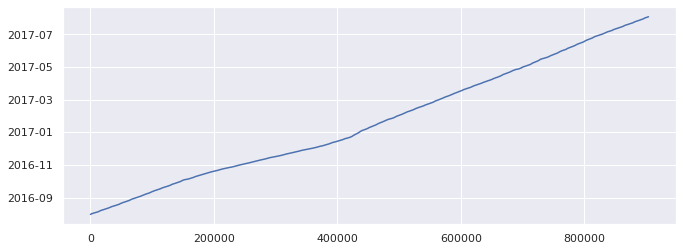

In [114]:
plt.plot(data['visitStartTime'])

In [115]:
data['date'] =  data['visitStartTime'].apply(lambda x: pd.Timestamp.to_pydatetime(x).date())
data['hour'] =  data['visitStartTime'].apply(lambda x: pd.Timestamp.to_pydatetime(x).hour)
data['datehour'] =  data['visitStartTime'].apply(lambda x: pd.Timestamp.to_pydatetime(x).replace(minute=0, second=0))
data['minute'] =  data['visitStartTime'].apply(lambda x: pd.Timestamp.to_pydatetime(x).replace(second=0))

data.head()

,visitStartTime,continent,country,date,hour,datehour,minute
0,2016-08-01 07:00:12,Americas,United States,2016-08-01,7,2016-08-01 07:00:00,2016-08-01 07:00:00
1,2016-08-01 07:04:26,Asia,Thailand,2016-08-01,7,2016-08-01 07:00:00,2016-08-01 07:04:00
2,2016-08-01 07:04:41,Americas,United States,2016-08-01,7,2016-08-01 07:00:00,2016-08-01 07:04:00
3,2016-08-01 07:06:01,Americas,Canada,2016-08-01,7,2016-08-01 07:00:00,2016-08-01 07:06:00
4,2016-08-01 07:06:10,Asia,Philippines,2016-08-01,7,2016-08-01 07:00:00,2016-08-01 07:06:00


In [116]:
first = data[data['visitStartTime'].apply(lambda x: pd.Timestamp.to_pydatetime(x).date()) == datetime.date(2017, 7, 2)]
first.shape

(1955, 7)

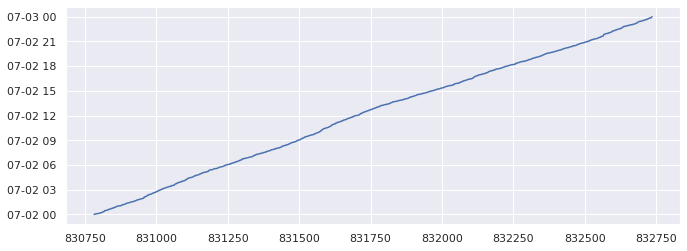

In [117]:
plt.plot(first['visitStartTime'])

In [118]:
first_eu = first[first['continent'] == 'Europe']
first_eu.head()

,visitStartTime,continent,country,date,hour,datehour,minute
830785,2017-07-02 00:01:57,Europe,United Kingdom,2017-07-02,0,2017-07-02,2017-07-02 00:01:00
830790,2017-07-02 00:04:42,Europe,Germany,2017-07-02,0,2017-07-02,2017-07-02 00:04:00
830793,2017-07-02 00:05:26,Europe,Romania,2017-07-02,0,2017-07-02,2017-07-02 00:05:00
830800,2017-07-02 00:08:58,Europe,France,2017-07-02,0,2017-07-02,2017-07-02 00:08:00
830804,2017-07-02 00:09:54,Europe,France,2017-07-02,0,2017-07-02,2017-07-02 00:09:00


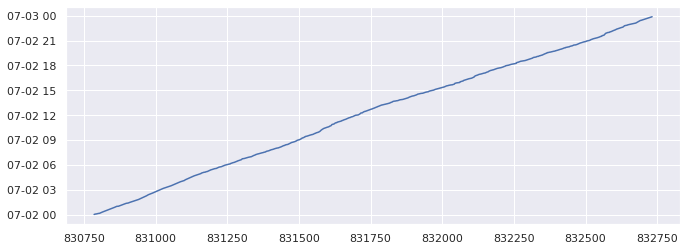

In [119]:
plt.plot(first_eu['visitStartTime'])

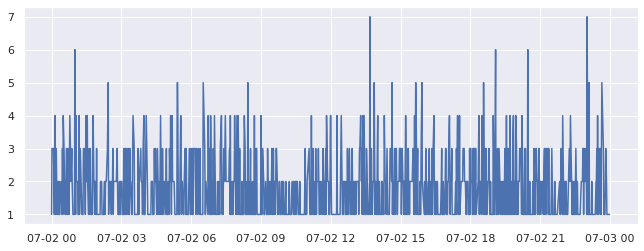

In [120]:
plt.plot(first.groupby('minute').count()['visitStartTime'])

In [121]:
ts = data.groupby(['datehour', 'date', 'hour']).count()['visitStartTime']

In [122]:
ts.head()

datehour             date        hour
2016-08-01 07:00:00  2016-08-01  7       38
2016-08-01 08:00:00  2016-08-01  8       42
2016-08-01 09:00:00  2016-08-01  9       51
2016-08-01 10:00:00  2016-08-01  10      43
2016-08-01 11:00:00  2016-08-01  11      41
Name: visitStartTime, dtype: int64

In [123]:
ts.shape

(8783,)

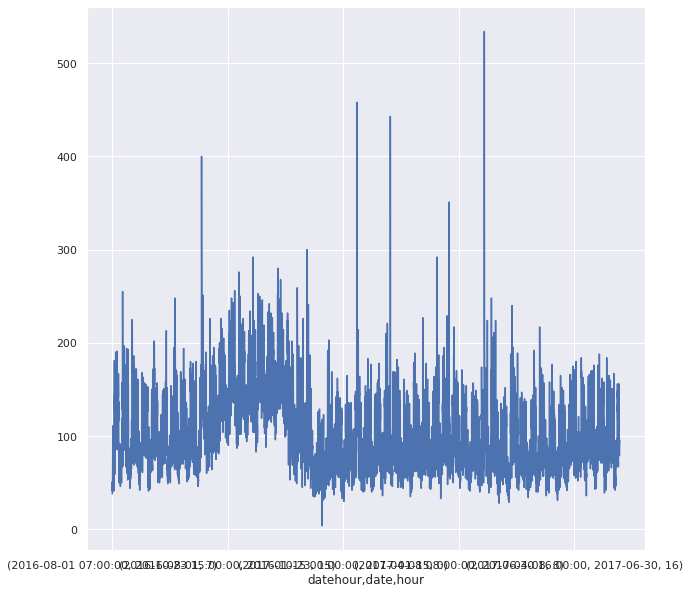

In [124]:
ts.plot(figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

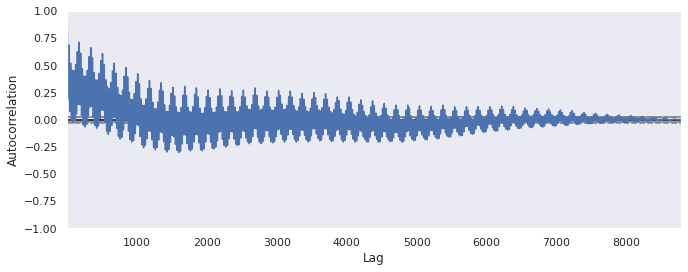

In [125]:
pd.plotting.autocorrelation_plot(ts)


In [126]:
#sns.boxplot(data=pd.DataFrame(ts), x='hour')

In [127]:
pd.DataFrame(ts)

,,,visitStartTime
datehour,date,hour,
2016-08-01 07:00:00,2016-08-01,7,38
2016-08-01 08:00:00,2016-08-01,8,42
2016-08-01 09:00:00,2016-08-01,9,51
2016-08-01 10:00:00,2016-08-01,10,43
2016-08-01 11:00:00,2016-08-01,11,41
...,...,...,...
2017-08-02 02:00:00,2017-08-02,2,84
2017-08-02 03:00:00,2017-08-02,3,99
2017-08-02 04:00:00,2017-08-02,4,79


In [128]:
ts.describe()

count    8783.000000
mean      102.886599
std        41.620769
min         4.000000
25%        72.000000
50%        93.000000
75%       129.000000
max       534.000000
Name: visitStartTime, dtype: float64

In [129]:
ts_scaled = ts//20

In [130]:
ts_scaled.head()

datehour             date        hour
2016-08-01 07:00:00  2016-08-01  7       1
2016-08-01 08:00:00  2016-08-01  8       2
2016-08-01 09:00:00  2016-08-01  9       2
2016-08-01 10:00:00  2016-08-01  10      2
2016-08-01 11:00:00  2016-08-01  11      2
Name: visitStartTime, dtype: int64

In [131]:
ts_scaled.describe()

count    8783.000000
mean        4.673232
std         2.106377
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        26.000000
Name: visitStartTime, dtype: float64

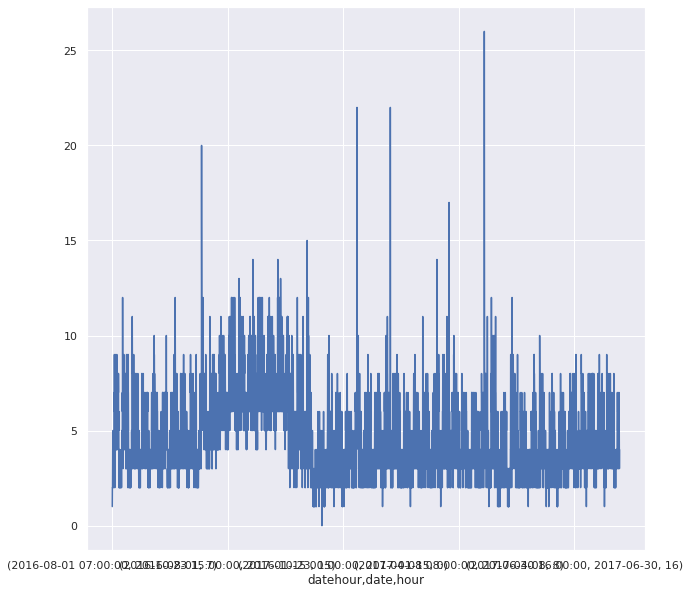

In [132]:
ts_scaled.plot(figsize=(10,10))
plt.show()

In [133]:
ts_scaled.to_csv('load_full.csv', index=False)